# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital‚Äôs number of ‚Äúpredicted‚Äù 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be ‚Äúexpected,‚Äù based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [11]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#import bokeh.plotting as bkp
#from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\nhcam\Miniconda2\envs\py36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


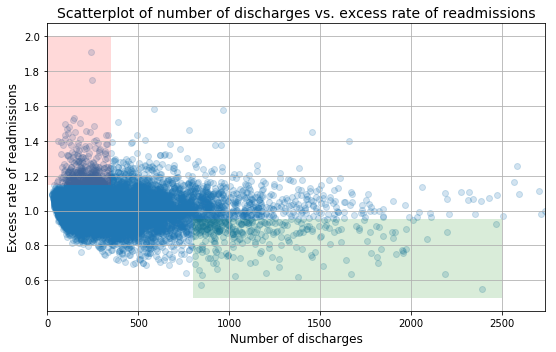

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Checking column names and summary statistics, then using boolean indexing to separate the hospitals into the two groups 
# described in the recommendation
print(clean_hospital_read_df.shape, clean_hospital_read_df.columns,clean_hospital_read_df.describe())
small_facilities = clean_hospital_read_df['Number of Discharges'] < 300
large_facilities = clean_hospital_read_df['Number of Discharges'] > 300 
large_series = clean_hospital_read_df[large_facilities]['Excess Readmission Ratio']
small_series = clean_hospital_read_df[small_facilities]['Excess Readmission Ratio']
small_series = small_series.dropna()
print(len(large_series),len(small_series),np.mean(large_series),np.mean(small_series))

(11578, 12) Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')        Provider Number  Number of Discharges  Footnote  \
count     11578.000000          11578.000000      81.0   
mean     257681.537226            362.909397       7.0   
std      154542.645531            309.176945       0.0   
min       10001.000000              0.000000       7.0   
25%      110129.750000            157.000000       7.0   
50%      250040.000000            280.000000       7.0   
75%      390041.000000            472.750000       7.0   
max      670082.000000           6793.000000       7.0   

       Excess Readmission Ratio  Predicted Readmission Rate  \
count              11497.000000                11497.000000   
mean                   1.007504                   17

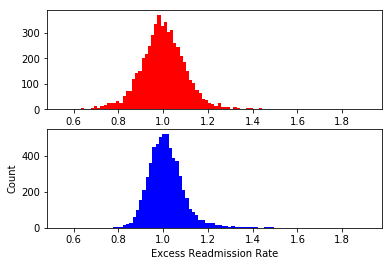

8.313708249297939 1.0439214775433433e-16


In [6]:
# Plotting the histograms of small and large hospital's excess readmission rate. I couldn't figure out how to make a legend 
# that corresponds to the whole subplot area, but the top histogram is for large hospitals and the bottom is for small. One
# thing I noticed right away is that small hospitals have a tail on the right side not balanced on the left. I wanted to see
# if removing those would change the statistical significance of a 2-sample ttest performed below.
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)
ax1.hist(large_series, bins = int(np.sqrt(len(large_series))),color='red',label = 'Large Hospitals(>300)')
ax2.hist(small_series,bins = int(np.sqrt(len(small_series))),color='blue',label = 'Small Hospitals(<300)')
plt.xlabel('Excess Readmission Rate')
plt.ylabel('Count')
plt.show()
t, p = stats.ttest_ind(small_series,large_series,equal_var = False)
print(t,p)

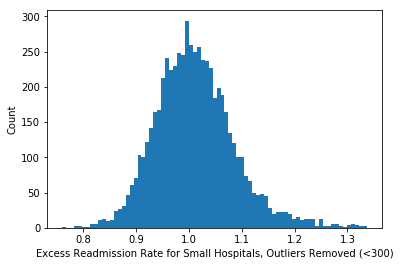

count    6072.000000
mean        1.011730
std         0.075525
min         0.760200
25%         0.960900
50%         1.006400
75%         1.055350
max         1.336800
Name: Excess Readmission Ratio, dtype: float64
7.204323495316167 6.199947173920587e-13


In [86]:
# Here I pull out observations from the small series that are more than 4 standard deviations above the mean. My reasoning 
# being that if we could focus our effort and recommendations on a small subset of hospitals then it would be a more powerful
# suggestion. Unfortunately, after plotting the same figure as above and running a two sample ttest again, the difference in
# mean excess readmission rate is still statistically significant. 
small_stdev = np.std(small_series) * 4
drop = small_series < np.mean(small_series) + small_stdev
outliers_drop = small_series[drop]
plt.hist(outliers_drop, bins = int(np.sqrt(len(outliers_drop))))
plt.xlabel('Excess Readmission Rate for Small Hospitals, Outliers Removed (<300)')
plt.ylabel('Count')
plt.show()
print(outliers_drop.describe())
t1, p1 = stats.ttest_ind(outliers_drop,large_series)
print(t1,p1)

In [22]:
##### Linear Regression model added

all_hospitals = clean_hospital_read_df[['Excess Readmission Ratio','Number of Discharges']].dropna()
y = all_hospitals.loc[:,'Excess Readmission Ratio'].values
x = all_hospitals.loc[:,'Number of Discharges'].values
print(np.corrcoef(x,y))

outliers_out = all_hospitals[all_hospitals['Number of Discharges']<3500]
y1 = outliers_out['Excess Readmission Ratio']
x1 = outliers_out['Number of Discharges']
print(np.corrcoef(x1,y1))
                
model = LinearRegression()
x = x.reshape(-1,1)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .1)
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

[[ 1.         -0.09739794]
 [-0.09739794  1.        ]]
[[ 1.         -0.09309554]
 [-0.09309554  1.        ]]
(10347, 1) (10347,) (1150, 1) (1150,)


0.01904915964712084

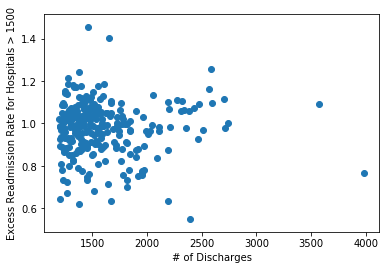

array([[ 1.        , -0.00720175],
       [-0.00720175,  1.        ]])

In [20]:
# Here, noticing a trend of increasing excess readmission ratio in hospitals larger than approximately 1200 discharges, I took
# a closer look at this section of the data. The correlation is still negative, but taking out that cluster around a ratio of and 
# ignoring that hospital of 4000 discharges, it looks like there is maybe an ideal discharge size for minimum excess 
# readmission ratio.
small_facilities = clean_hospital_read_df['Number of Discharges'] < 1200 
large_facilities = (clean_hospital_read_df['Number of Discharges'] > 1200) & (clean_hospital_read_df['Number of Discharges'] < 4000)
x = clean_hospital_read_df[large_facilities]['Number of Discharges']
y = clean_hospital_read_df[large_facilities]['Excess Readmission Ratio']
plt.scatter(x,y)
plt.ylabel('Excess Readmission Rate for Hospitals > 1500')
plt.xlabel('# of Discharges')
plt.show()
np.corrcoef(x,y)

A.) In general I agree with the above anaylsis, but not necessarily the recommendation. It does hold true that over all hospitals sampled, there is a negative correlation between # of discharges and the excess readmission ratio. However, I would not call this a 'significant correlation' between the two variables as the Pearson Coefficient is only -.1. In terms of the recommendation, I think that increasing hospital size to a specific point can be effective. However, when looking at all the data, there almost seems to be a reversal of trends around discharge size > 1500. I took a look at this section in more detail in the plot directly above, and while the correlation coefficeint is essentially 0, there appears to be a trend of increasing readmission rate as hospitals get larger. If we had more data on hospitals 2500<x<4000 then we might be able to elucidate this trend better. As such, I would alter the recommendation for an ideal hospital size of 1000<x<1500.

B.) Based on their recommendation that hospitals smaller than 300 discharges need improvement, I ran a two sample ttest for the difference in means of two samples with unequal variance. Or, a Welch's t-test. I noted in the original histograms that the variance in large hospital's excess readmission ratio is higher. The and p-value for this test was statistically significant at ùõº  = .01. It is essentially 0, which means we can reject the null hypothesis that there is no difference in excess readmission ratio between small and large hospitals. This leads me to confirm the opinion expressed above that hospitals under 300 discharges be given a mandate to improve their excess readmission rate. However, as mentioned above, I don't think that a blanket 'make all hospitals larger' mandate will be succesful. It appears to me that there is an ideal hospital size of around 1000-1500 discharges. Without further data on larger hospitals, I cannot confirm this recommendation statisically. 

I chose to just run a ttest from the scipy stats library as the sample sizes are so large and normally distributed (and the p-values so low) that it didn't seem there was anything to gain from constructing a bootstrap hypothesis test.

Operationally, statistical significance in this test of different readmission ratios may not mean much. The real world difference between a mean of 0.9998 and 1.0142 readmission ratio is negligible. While they are statiscally signficantly different, commiting resources to trying to make them statistically equal is a poor plan. Where the resources might be better devoted is working to try and find out why there is a group of hospitals above a 1.5 readmission ratio (and what they're doing wrong). Another useful recommendation would be to study the hospital that has 4000 discharges and a readmission ratio of approxiamtely 0.8, cause they're doing something very right.

C.) The scatterplot above is a useful figure for quickly identifying the main underlying trends in the relationship between readmission ratio and discharge numbers. It falls short for a few reasons. First, it inexplicably leaves out the data on some of the largest hospitals. Second, it is really difficult to convey the relationship we're looking at, namely a difference in hospitals larger or smaller than 300 discharges because all the data is the same color. Finally, you can't tell where the areas of highest concentration are in the clusters because the points are opaque. In the figure below I've fixed those things and made a more intuitive figure.


Further analysis: Upon returning to this dataset, I looked at running a linear regression model on the whole dataset. I wanted to see if given the number of discharges, we could predict the excess readmission ratio. I fit the model to the whole dataset with any row containing NaN dropped. Using a train test split of 75-25, the model's success was very small. Only about 2% of the variation in excess readmission rate. Number of discharges is a very poor predictor of excess readmission ratio and recommendations on hospital policies should not be based solely on this variable.

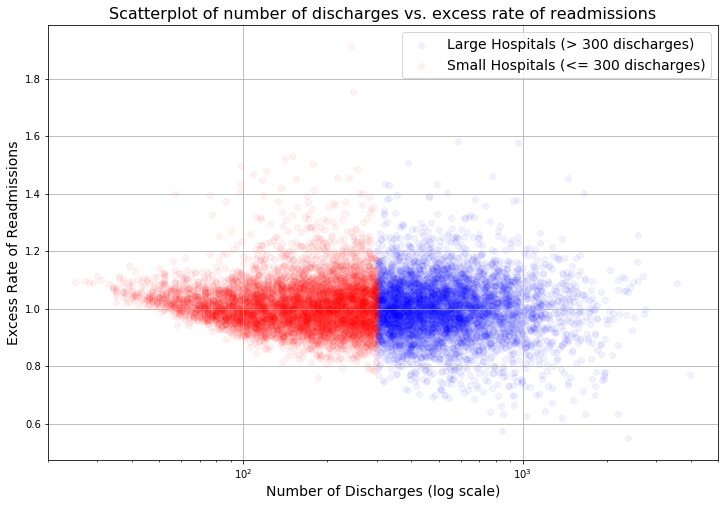

In [47]:
large = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>300]
small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<= 300]
x_large = [a for a in large['Number of Discharges']]
y_large = list(large['Excess Readmission Ratio'])
x_small = [ a for a in small['Number of Discharges']]
y_small = list(small['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x_large, y_large, color='blue', alpha=0.05)
ax.scatter(x_small, y_small, color='red', alpha=0.05)
ax.set_xlim([20, 5000])
ax.set_xscale('log')
ax.set_xlabel('Number of Discharges (log scale)', fontsize=14)
ax.set_ylabel('Excess Rate of Readmissions', fontsize=14)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=16)
ax.legend(['Large Hospitals (> 300 discharges)', 'Small Hospitals (<= 300 discharges)'], fontsize=14)
ax.grid(True)